# Support Vector Machine with codpy : Basic Principles
## Introduction
In this tutorial we present some basic functionalities of support vector machines. The main capabilities of SVMs are discrete function representation, that are at heart of the Machine Learning approach. More precisely, consider a general function $f(x) \in \mathbb{R}^P$, with $x \in \mathbb{R}^D$ and a set of sampling

$$\{x_i, f(x_i)\}, \quad i = 1,\dots,N, \quad x_i \in \mathbb{R}^D, \quad f(x_i) \in \mathbb{R}^P$$

%%latex
Suppose now that you are given another set of points $\{z_j\}, \quad j = 1,\dots,M,\quad z_i \in \mathbb{R}^D$. Then you can use a very general extrapolation function, that will always output a result

$$ f_z = \text{extrapolate}\Big(x,f_x,z \Big) \in \mathbb{R}^{M \times P}$$
for any matrices $x,f_x,z$ having size
$$ x \in \mathbb{R}^{N \times D}, f_x \in \mathbb{R}^{N \times P}, z \in \mathbb{R}^{M \times D}$$

Obviously, two questions arise here :
\begin{enumerate}
\item what are the hidden parameters to build this extrapolation
\item how good is the approximation $f_z$ while compared to $f(z)$.
\end{enumerate}

We discuss these aspects in this tutorial with a simple example, for $D=1,2$.


In [1]:
import os, sys
from Examples1D2D import *

codpy_tools loaded
variables ok


## Test D = 1
On prend $N = 100$, on tire au hasard les $x_i \sim Unif(0,1)$. 

On regarde la fonction $$f(x) = \sin (4\pi x)$$

In [2]:
D = 1
(x,fx,z) = data_genMD(N, M, D, cosD,type="sto")


data_genMD.sizez: 10000
data_genMD.sizex: 500


## Test: D=1 avec SciPy

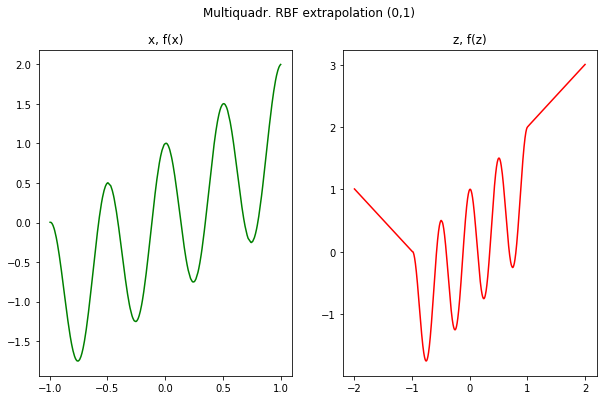

In [3]:
start_time = time.time()
fz = RBF_m(x,fx, z, function = "gaussian",norm = "euclidean")
plotD(x,fx,z,fz, 'Multiquadr. RBF extrapolation (0,1)')

## Test: D=1 avec CodPy. Basic Principles : pick a kernel, that is a function
$$K(x,y)$$

In [ ]:

fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Multiquadr. Codpy extrapolation (0,1)')

## Ingénierie du noyau.
### No Magic!

In [ ]:
fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Multiquadr. Codpy extrapolation (0,1)')
kernel_setters.set_gaussian_kernel()

## Avec un regresseur polynomial :

In [ ]:
kernel_setters.set_gaussian_kernel(polynomial_order = 2)
fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Gaussian - periodic. Codpy extrapolation (0,1)')

## Avec un noyeau périodique

In [ ]:
kernel_setters.set_gaussianper_kernel(polynomial_order = 0)
fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Gaussian - periodic. Codpy extrapolation (0,1)')

## Avec un noyau périodique et un regresseur lineaire

In [ ]:
kernel_setters.set_gaussianper_kernel(polynomial_order = 2)
fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Gaussian - periodic linear regressor. Codpy extrapolation (0,1)')

## Test: D=2 avec SciPy

In [ ]:
    D=2
    (x,fx,z) = data_genMD(N=N,M=M, D=D, fun = cosD,type = "not sto")
    fz = RBF_m(x,fx, z, function = "gaussian",norm = "euclidean")
    plotD(x,fx,z,fz, 'Gaussian. RBF extrapolation (0,1)',70)

## Test: D=2 avec CodPy. Noyau Gaussien

In [ ]:
from functools import partial
set_map = partial(map_setters.set_min_distance_map,**{'distance' : 'norm22'})
kernel_setters.set_gaussian_kernel(set_map = set_map)
fz = op.extrapolation(x = x, z=z,fx=fx)
plotD(x,fx,z,fz, 'Multiquadr. Codpy extrapolation (0,1)',70) 

## Test: D=2 avec CodPy. Noyau Gaussien-Périodique.

In [ ]:
kernel_setters.set_gaussianper_kernel()
fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Multiquadr. Codpy extrapolation (0,1)',70) 

## Finalement : Noyau Gaussien-Périodique et regresseur linéaire

In [ ]:
kernel_setters.set_gaussianper_kernel(polynomial_order = 2)
fz = cd.ops.extrapolate(x,fx,z)
plotD(x,fx,z,fz, 'Multiquadr. Codpy extrapolation gaussian per - linear regressor',70) 